# Your name: David (Jung Won) Yang

# Your netID: jwy273

# Problem 1 (30 points)

You may choose one of the following Alternatives, whichever you prefer. You may do both for extra credit.

## Alternative 1

Suppose that we have infinitely many of three different types of lightbulbs in a box. The lifetime of each of the $i$th type of lightbulb follow a $N(\mu_i,1)$ distribution. We sample 500 lightbulbs and get the sequence of lifetimes in data1.csv. Use the EM-algorithm to find the maximum likelihood estimator of the parameters 

$$\theta = (\mu_1,\mu_2,\mu_3, p_1, p_2),$$

where $p_i$ is the $p_i$ is the proportion of the $i$th type in the box (note $p_3=1-p_1-p_2$). First plot the data (scatter plot) and make an initial guess for the means based on what you see. You can initialize $p_1$ and $p_2$ to be $0.3$, $0,3$.

For this problem, you have to do some calculations to find the iteration rule (mimicking what we did during Lecture for the mixture of two Gaussians), which you do not have to hand in, but you have to write what your update rule is. (The correct formulas are analogous to what we obtained during lecture for the two Gaussian case.)

## Alternative 2

Consider 500 samples from the mixture of two bivariate normal distributions $N({\bf\mu}_1,I)$ and $N({\bf\mu}_2,I)$ ($\mu$ is the mean vector and the covariance matrix is the identity). You have the parameters $(p, \mu_{11}, \mu_{12}, \mu_{21}, \mu_{22})$ (where $\mu_{ij}$ is the $j$th component of the ${\bf\mu}_i$). The corresponding data is in data2.csv. Plot the data (scatter plot) and discern a sensible initialization of the means. You can initialize $p$ to be $0.5$. Use the resulting EM algorithm to compute the maximum likelihood estimate. To derive the update rule, mimick what we did during Lecture for the one dimensional case.

## Extra Credit: 

Whichever problem you chose, obtain a bootstrap sample of $B=100$ for the MLE and derive a 95% bootstrap confidence interval for a parameter of your choosing.

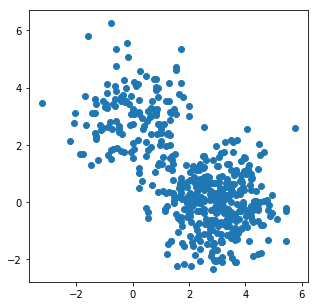

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from scipy import stats

cwd = os.getcwd()
datadir = 'C:/Users/David/Desktop/data2.csv'
colnames=['x', 'y'] 
data2 = pd.read_csv(datadir, names = colnames, header = None)
#data2.head()



plt.figure(figsize=(5,5))
plt.scatter(data2.x,data2.y)
plt.show()



In [6]:
def tau(p, mu0, mu1, data):
    # Computes the tau-factors
    a = stats.multivariate_normal.pdf(data, mean=mu0);
    b = stats.multivariate_normal.pdf(data, mean=mu1);
    
    return p * b / (p * b + (1-p) * a)

def update(p_old, mu0_old, mu1_old, y_data):
    # Update rule for the iteration
    if p_old == 1:
        return [1, mu0_old, y_data.mean()]
    elif p_old == 0:
        return [0, y_data.mean(), mu1_old]
    else:
        tau_factors = tau(p_old, mu0_old, mu1_old, y_data);
        p_new = tau_factors.mean()
        mu0_new = np.dot(np.transpose(y_data), tau_factors + -1) / (tau_factors + -1).sum()
        mu1_new = np.dot(np.transpose(y_data), tau_factors) / tau_factors.sum()
        return [p_new, mu0_new, mu1_new]

def log_likelihood(p, mu0, mu1, data):
    return (np.log((1-p)*stats.multivariate_normal.pdf(data, mean=mu0) + p * stats.multivariate_normal.pdf(data, mean = mu1))).sum();


            
initial_theta = [.5 ,np.array([-2, -2]) ,np.array([6, 6])]
num_of_iter = 15

theta = initial_theta
ll = log_likelihood(theta[0], theta[1], theta[2], data2)
print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

for i in range(num_of_iter):
    theta = update(theta[0], theta[1], theta[2],  data2)
    ll = log_likelihood(theta[0], theta[1], theta[2], data2)
    print("{:2d} p: {}, mu0: {}, mu1: {}   log-Likelihood: {:.2f} ".format(i+1,theta[0],theta[1],theta[2], ll))
    #print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

Initial: [0.5, array([-2, -2]), array([6, 6])] log-Likelihood: -8103.62
 1 p: 0.2326395575665592, mu0: [ 1.87085238  0.51702012], mu1: [ 2.96608634  1.86295895]   log-Likelihood: -2324.89 
 2 p: 0.20986815193258226, mu0: [ 2.05393232  0.53537831], mu1: [ 2.39564594  1.93988117]   log-Likelihood: -2244.54 
 3 p: 0.23380594290663628, mu0: [ 2.42477363  0.26488096], mu1: [ 1.14539424  2.68251741]   log-Likelihood: -1851.34 
 4 p: 0.27976122456434765, mu0: [ 2.90276428 -0.01331187], mu1: [ 0.12497706  3.00158271]   log-Likelihood: -1701.91 
 5 p: 0.28287177543195874, mu0: [ 2.94019726 -0.02481042], mu1: [ 0.06062352  2.99758073]   log-Likelihood: -1701.31 
 6 p: 0.28327886490337495, mu0: [ 2.94197764 -0.02541595], mu1: [ 0.06025714  2.99476942]   log-Likelihood: -1701.31 
 7 p: 0.28340351128926305, mu0: [ 2.94230478 -0.02564714], mu1: [ 0.06069738  2.99402567]   log-Likelihood: -1701.31 
 8 p: 0.28344333224000595, mu0: [ 2.94240255 -0.02572493], mu1: [ 0.06085505  2.99379806]   log-Likelih

# Problem 2 (10 points)

Problem 11.12.5 in Wassermann

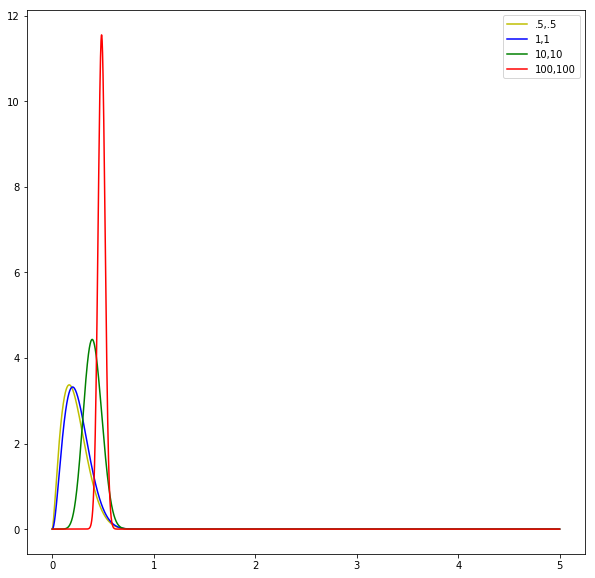

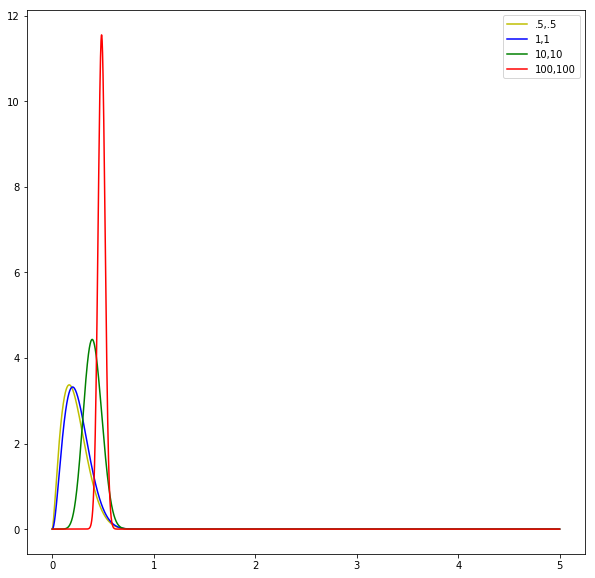

In [45]:
import scipy

x_sum = 2
n = 10

def f(x,a,b):
    return scipy.stats.beta.pdf(x, x_sum + a, -x_sum + n + b)
plt.figure(figsize=(10,10))
x = np.arange(0., 5., .001)
p1, = plt.plot(x,f(x,.5,.5),'y',label = '.5,.5')
p2, = plt.plot(x,f(x,1,1),'b', label = '1,1')
p3, = plt.plot(x,f(x,10,10),'g', label = '10,10') 
p4, = plt.plot(x,f(x,100,100),'r', label = '100,100')
plt.legend(handles = [p1,p2,p3,p4])
plt.show()
